From: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

## Ensure proxy setup if needed

In [78]:
import os
import sys
os.environ['http_proxy'] = <<ENTER PROXY HERE>>
os.environ['https_proxy'] = <<ENTER PROXY HERE>>

In [4]:
!pip freeze | grep tensorflow

tensorflow-estimator==2.1.0
tensorflow-gpu==2.1.0


In [18]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [19]:
!pwd

/tf


In [22]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])
result = tf.multiply(x1,x2)
print(result)

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


In [29]:
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))


In [31]:
from tensorflow.keras import Input

x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
model = Model(inputs=x_in, outputs=x_out)

## MLP for Binary Classification

In [44]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv

--2021-03-24 03:43:19--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv
Connecting to 10.40.0.1:3130... connected.
Proxy request sent, awaiting response... 200 OK
Length: 76466 (75K) [text/plain]
Saving to: ‘ionosphere.csv’

ionosphere.csv      100%[===================>]  74.67K  --.-KB/s    in 0.1s    

2021-03-24 03:43:19 (626 KB/s) - ‘ionosphere.csv’ saved [76466/76466]



In [45]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = '/tf/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.905
Predicted: 0.996


## MLP for Multiclass Classification

In [51]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv

--2021-03-24 03:48:54--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Connecting to 10.40.0.1:3130... connected.
Proxy request sent, awaiting response... 200 OK
Length: 4549 (4.4K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   4.44K  --.-KB/s    in 0.002s  

2021-03-24 03:48:55 (2.42 MB/s) - ‘iris.csv.1’ saved [4549/4549]



In [50]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = '/tf/iris.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.960
Predicted: [[0.96548826 0.02517315 0.00933858]] (class=0)


## MLP for Regression

In [52]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv

--2021-03-24 03:51:01--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
Connecting to 10.40.0.1:3130... connected.
Proxy request sent, awaiting response... 200 OK
Length: 41295 (40K) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]  40.33K  --.-KB/s    in 0.09s   

2021-03-24 03:51:01 (468 KB/s) - ‘housing.csv’ saved [41295/41295]



In [53]:
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = '/tf/housing.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 43.580, RMSE: 6.602
Predicted: 28.959


## CNN Models

# broken right now!

In [55]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [Errno 104] Connection reset by peer

## RNN Models

In [57]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv

--2021-03-24 03:55:37--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv
Connecting to 10.40.0.1:3130... connected.
Proxy request sent, awaiting response... 200 OK
Length: 1834 (1.8K) [text/plain]
Saving to: ‘monthly-car-sales.csv’

monthly-car-sales.c 100%[===================>]   1.79K  --.-KB/s    in 0s      

2021-03-24 03:55:38 (60.6 MB/s) - ‘monthly-car-sales.csv’ saved [1834/1834]



In [58]:
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
	# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)
 
# load the dataset
path = '/tf/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
Train on 91 samples, validate on 12 samples
Epoch 1/350
91/91 - 1s - loss: 35721365.0110 - mae: 4800.4409 - val_loss: 28484714.0000 - val_mae: 4448.6309
Epoch 2/350
91/91 - 0s - loss: 22176512.8132 - mae: 3822.5750 - val_loss: 21696788.0000 - val_mae: 3982.7598
Epoch 3/350
91/91 - 0s - loss: 20524341.6923 - mae: 3692.5015 - val_loss: 24611040.0000 - val_mae: 4437.2612
Epoch 4/350
91/91 - 0s - loss: 21991428.2198 - mae: 3812.9375 - val_loss: 22218148.0000 - val_mae: 3816.7126
Epoch 5/350
91/91 - 0s - loss: 19530273.2967 - mae: 3660.5061 - val_loss: 15099708.0000 - val_mae: 3351.8660
Epoch 6/350
91/91 - 0s - loss: 18455456.8352 - mae: 3418.2661 - val_loss: 13770700.0000 - val_mae: 3301.3665
Epoch 7/350
91/91 - 0s - loss: 18168215.7582 - mae: 3441.3623 - val_loss: 18065902.0000 - val_mae: 3549.0977
Epoch 8/350
91/91 - 0s - loss: 16443787.2747 - mae: 3300.7273 - val_loss: 12232637.0000 - val_mae: 2660.4792
Epoch 9/350
91/91 - 0s - loss: 14961384.8681 - mae

## Advanced Model Features

In [59]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


# Broken right now, issue with import stuff + pip

In [76]:
!pip install pydot
!pip install graphviz

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [73]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


## Plotting learning curves

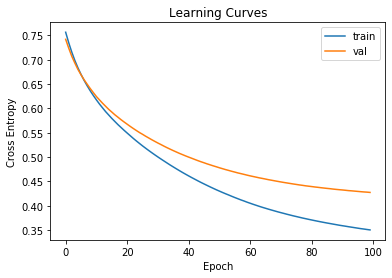

In [77]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()